# Imports

In [1]:
import pandas as pd
import numpy as np

from time import sleep
from random import randint

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [2]:
import sys
sys.path.insert(1, '../Src/Lib')
from config import *

In [41]:
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering

from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
import pickle
import yaml

# Spotify API

## Token

In [5]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= Client_ID, client_secret= Client_Secret))

## Not Hot

### Request

#### Function to get the data

There seems to be a problem with some items that are not songs and make the function stop, we had to call it several times setting the offset 1 item after the stop.

In [279]:
def analyze_playlist(creator, playlist_id, pages=5, start=0):
    
    playlist_columns = ["Song", "Artist", "ID", "Link", "danceability", "energy", "key", "loudness", "mode", "speechiness", "instrumentalness", "liveness", "valence", "tempo", "duration_ms", "time_signature"]
    
    playlist_df = pd.DataFrame(columns = playlist_columns)
    
    playlist = sp.user_playlist_tracks(creator, playlist_id, offset=start)
    nap = randint(1,2)
    for i in range(pages):
        print("Page",i+1)
        try:
            tracks = playlist["items"]
            for track in tracks:
                playlist_features = {}
                playlist_features["Song"] = track["track"]["name"]
                playlist_features["Artist"] = track["track"]["album"]["artists"][0]["name"]
                playlist_features["ID"] = track["track"]["id"]
                playlist_features["Link"] = track["track"]["external_urls"]["spotify"]
        
                audio_features = sp.audio_features(playlist_features["ID"])[0]
                for feature in playlist_columns[4:]:
                    playlist_features[feature] = audio_features[feature]
        
                track_df = pd.DataFrame(playlist_features, index = [0])
                playlist_df = pd.concat([playlist_df, track_df], ignore_index = True)
            playlist = sp.next(playlist)
            
        except:
            continue
        
        print("Sleeping for",nap,"seconds")
        sleep(nap)
    
    playlist_df.columns = ["Song", "Artist", "ID", "Link", "Danceability", "Energy", "Key", "Loudness", "Mode", "Speechiness", "Instrumentalness", "Liveness", "Valence", "Tempo", "Duration", "Time Signature"]
        
    return playlist_df

In [104]:
not_hot_0 = analyze_playlist("acclaimed music", "1G8IpkZKobrIlXcVPoSIuf", 5)
not_hot_0["ID"].nunique()

Page 1
Sleeping for 2 seconds
Page 2
Sleeping for 2 seconds
Page 3
Sleeping for 2 seconds
Page 4
Sleeping for 2 seconds
Page 5


467

In [105]:
skip1 = not_hot_0["ID"].nunique() + 1
skip1

468

In [106]:
not_hot_1 = analyze_playlist("acclaimed music", "1G8IpkZKobrIlXcVPoSIuf", 10, skip1)
not_hot_1["ID"].nunique()

Page 1
Sleeping for 1 seconds
Page 2
Sleeping for 1 seconds
Page 3
Sleeping for 1 seconds
Page 4
Sleeping for 1 seconds
Page 5
Sleeping for 1 seconds
Page 6
Sleeping for 1 seconds
Page 7
Sleeping for 1 seconds
Page 8
Sleeping for 1 seconds
Page 9
Sleeping for 1 seconds
Page 10
Sleeping for 1 seconds


1000

In [107]:
skip2 = skip1 + not_hot_1["ID"].nunique() + 1
skip2

1469

In [108]:
not_hot_2 = analyze_playlist("acclaimed music", "1G8IpkZKobrIlXcVPoSIuf", 10, skip2)
not_hot_2["ID"].nunique()

Page 1
Sleeping for 1 seconds
Page 2
Sleeping for 1 seconds
Page 3
Sleeping for 1 seconds
Page 4
Sleeping for 1 seconds
Page 5
Sleeping for 1 seconds
Page 6
Sleeping for 1 seconds
Page 7
Sleeping for 1 seconds
Page 8
Sleeping for 1 seconds
Page 9
Sleeping for 1 seconds
Page 10
Sleeping for 1 seconds


1000

In [109]:
skip3 = skip2 + not_hot_2["ID"].nunique() + 1
skip3

2470

In [110]:
not_hot_3 = analyze_playlist("acclaimed music", "1G8IpkZKobrIlXcVPoSIuf", 2, skip3)
not_hot_3["ID"].nunique()

Page 1
Sleeping for 1 seconds
Page 2


188

In [111]:
skip4 = skip3 + not_hot_3["ID"].nunique() + 1
skip4

2659

In [280]:
not_hot_4 = analyze_playlist("acclaimed music", "1G8IpkZKobrIlXcVPoSIuf", 1, skip4)
not_hot_4["ID"].nunique()

Page 1


12

In [130]:
skip5 = skip4 + not_hot_4["ID"].nunique() + 1
skip5

2672

In [131]:
not_hot_5 = analyze_playlist("acclaimed music", "1G8IpkZKobrIlXcVPoSIuf", 4, skip5)
not_hot_5["ID"].nunique()

Page 1
Sleeping for 1 seconds
Page 2
Sleeping for 1 seconds
Page 3
Sleeping for 1 seconds
Page 4


307

In [132]:
skip6 = skip5 + not_hot_5["ID"].nunique() + 1
skip6

2980

In [134]:
not_hot_6 = analyze_playlist("acclaimed music", "1G8IpkZKobrIlXcVPoSIuf", 5, skip6)
not_hot_6["ID"].nunique()

Page 1
Sleeping for 1 seconds
Page 2
Sleeping for 1 seconds
Page 3
Sleeping for 1 seconds
Page 4
Sleeping for 1 seconds
Page 5


407

In [135]:
skip7 = skip6 + not_hot_6["ID"].nunique() + 1
skip7

3388

In [138]:
not_hot_7 = analyze_playlist("acclaimed music", "1G8IpkZKobrIlXcVPoSIuf", 1, skip7)
not_hot_7["ID"].nunique()

Page 1


82

In [139]:
skip8 = skip7 + not_hot_7["ID"].nunique() + 1
skip8

3471

In [140]:
not_hot_8 = analyze_playlist("acclaimed music", "1G8IpkZKobrIlXcVPoSIuf", 2, skip8)
not_hot_8["ID"].nunique()

Page 1
Sleeping for 1 seconds
Page 2


169

In [141]:
skip9 = skip8 + not_hot_8["ID"].nunique() + 1
skip9

3641

In [153]:
not_hot_9 = analyze_playlist("acclaimed music", "1G8IpkZKobrIlXcVPoSIuf", 1, skip9)
not_hot_9["ID"].nunique()

Page 1


43

### Concat and save

In [150]:
not_hot = pd.concat([not_hot_0, not_hot_1, not_hot_2, not_hot_3, not_hot_4, not_hot_5, not_hot_6, not_hot_7, not_hot_8, not_hot_9]).reset_index(drop=True)
not_hot

,Song,Artist,ID,Link,Danceability,Energy,Key,Loudness,Mode,Speechiness,Instrumentalness,Liveness,Valence,Tempo,Duration,Time Signature
0,Like a Rolling Stone,Bob Dylan,3AhXZa8sUQht0UEdBJgpGc,https://open.spotify.com/track/3AhXZa8sUQht0UE...,0.482,0.721,0,-6.839,1,0.0321,0,0.189,0.557,95.263,369600,4
1,Smells Like Teen Spirit,Nirvana,3oTlkzk1OtrhH8wBAduVEi,https://open.spotify.com/track/3oTlkzk1OtrhH8w...,0.485,0.863,1,-9.027,1,0.0495,0.0162,0.138,0.767,116.835,300977,4
2,A Day In The Life - Remastered,The Beatles,3ZFBeIyP41HhnALjxWy1pR,https://open.spotify.com/track/3ZFBeIyP41HhnAL...,0.364,0.457,4,-14.162,0,0.0675,0.000106,0.922,0.175,163.219,337413,4
3,Good Vibrations (Mono),The Beach Boys,5Qt4Cc66g24QWwGP3YYV9y,https://open.spotify.com/track/5Qt4Cc66g24QWwG...,0.398,0.413,1,-10.934,1,0.0388,0.000025,0.0891,0.331,133.574,219147,4
4,Johnny B Goode,Chuck Berry,7MH2ZclofPlTrZOkPzZKhK,https://open.spotify.com/track/7MH2ZclofPlTrZO...,0.518,0.756,10,-10.851,1,0.0915,0.000062,0.317,0.968,166.429,160893,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,I Don't Like,Chief Keef,1h6kgem1ai8vUgO1rZOwfB,https://open.spotify.com/track/1h6kgem1ai8vUgO...,0.742,0.844,2,-4.622,1,0.0479,0,0.0659,0.416,131.986,293840,4
39,"Happy - From ""Despicable Me 2""",Pharrell Williams,5b88tNINg4Q4nrRbrCXUmg,https://open.spotify.com/track/5b88tNINg4Q4nrR...,0.647,0.822,5,-4.662,0,0.183,0,0.0908,0.962,160.019,232720,4
40,Express Yourself - Remastered Version,Charles Wright & The Watts 103rd Street Rhythm...,6gQZKkphKIMxZgca5r7ImA,https://open.spotify.com/track/6gQZKkphKIMxZgc...,0.461,0.818,8,-8.482,1,0.125,0,0.266,0.721,92.305,229653,4
41,Call Me The Breeze,J.J. Cale,0D4JiHE8NkSQa5ZdZkYYLw,https://open.spotify.com/track/0D4JiHE8NkSQa5Z...,0.815,0.415,11,-15.573,1,0.0384,0.012,0.0943,0.817,91.539,157617,4


In [151]:
not_hot["ID"].nunique()

3675

In [152]:
not_hot.to_csv("Not_Hot.csv")

## Search Function

In [137]:
def search_song():
    print("Please write a song name:")
    song = str(input())
    print()
    
    results = sp.search(q=song, limit = 5)
    for track in results["tracks"]["items"]:
        print(results["tracks"]["items"].index(track)+1)
        print("Song:",track["name"])
        print("Artist:",track["artists"][0]["name"])
        print("Album:",track["album"]["name"])
        print("Link:",track["external_urls"]["spotify"])
        print()
        
    print("Which song did you mean?",range(len(results["tracks"]["items"]))[0]+1,"-",range(len(results["tracks"]["items"]))[-1]+1)
    print("If your song is not here, input 0")
    select = int(input())
    print()
    
    while select > len(results["tracks"]["items"]):
        print("Please input a valid number")
        select = int(input())
        print()
        
    else:
        if select == 0:
            search_song()
        
        else:
            print("Selected", results["tracks"]["items"][select-1]["name"],"by",results["tracks"]["items"][select-1]["artists"][0]["name"])
            print()
        
            track_columns = ["Song", "Artist", "ID", "Link",
                         "danceability", "energy", "key", "loudness",
                         "mode", "speechiness", "instrumentalness", "liveness",
                         "valence", "tempo", "duration_ms", "time_signature"]
        
            track = results["tracks"]["items"][select-1]
            track_features = {}
            track_features["Song"] = track["name"]
            track_features["Artist"] = track["artists"][0]["name"]
            track_features["ID"] = track["id"]
            track_features["Link"] = track["external_urls"]["spotify"]
        
            audio_features = sp.audio_features(track["id"])[0]
            for feature in track_columns[4:]:
                track_features[feature] = audio_features[feature]
            
            song_data = pd.DataFrame.from_dict(track_features, orient = "index").T
            song_data.columns = song_data.columns = ['Song', 'Artist', 'ID', 'Link',
                                                 'Danceability', 'Energy', 'Key','Loudness',
                                                 'Mode', 'Speechiness', 'Instrumentalness', 'Liveness',
                                                 'Valence', 'Tempo', 'Duration', 'Time Signature']
        
            song_data = song_data.drop(columns = ["Song", "Artist", "ID", "Link", "Energy", "Mode", "Time Signature", "Duration"])
            
            with open("../Transformers/Power_Transformer.pkl", "rb") as file:
                transformer = pickle.load(file)
            song_data_pt = transformer.transform(song_data)
        
            with open("../Scalers/Standard_Scaler.pkl", "rb") as file:
                scaler = pickle.load(file)
            song_data_pt_ss = scaler.transform(song_data_pt)
        
            with open("../Models/KM_7.pkl", "rb") as file:
                km = pickle.load(file)
            cluster = km.predict(song_data_pt_ss)
            
            with open("../params.yaml", "r") as file:
                config = yaml.safe_load(file)
            
            with open(config["Data"]["Songs_DB_Clusters"], "r", encoding = "utf-8") as file:
                songs = pd.read_csv(file)
        
            if track_features["ID"] in songs[songs["Label"] == "H"]:
                print("Your song is in the Top 100!")
                examples = songs[(songs["Label"] == "H") & (songs["Cluster"] == cluster[0])].sample(3)
            
                print("Song:",examples.iloc[0]["Song"])
                print("Artist:",examples.iloc[0]["Artist"])
                print("Link:",examples.iloc[0]["Link"])
                print()
                print("Song:",examples.iloc[1]["Song"])
                print("Artist:",examples.iloc[1]["Artist"])
                print("Link:",examples.iloc[1]["Link"])
                print()
                print("Song:",examples.iloc[2]["Song"])
                print("Artist:",examples.iloc[2]["Artist"])
                print("Link:",examples.iloc[2]["Link"])        
            else:
                examples = songs[(songs["Label"] == "N") & (songs["Cluster"] == cluster[0])].sample(3)
            
                print("Song:",examples.iloc[0]["Song"])
                print("Artist:",examples.iloc[0]["Artist"])
                print("Link:",examples.iloc[0]["Link"])
                print()
                print("Song:",examples.iloc[1]["Song"])
                print("Artist:",examples.iloc[1]["Artist"])
                print("Link:",examples.iloc[1]["Link"])
                print()
                print("Song:",examples.iloc[2]["Song"])
                print("Artist:",examples.iloc[2]["Artist"])
                print("Link:",examples.iloc[2]["Link"])               

In [138]:
search_song()

Please write a song name:


 Angst



1
Song: Angst
Artist: Rammstein
Album: Zeit
Link: https://open.spotify.com/track/0UuNO0yYvsMPlyLF7RfQlg

2
Song: Angst
Artist: INZO
Album: Angst
Link: https://open.spotify.com/track/3NivHilTTTs8SQwp51yG0X

3
Song: Teen Angst (What The World Needs Now)
Artist: Cracker
Album: Cracker
Link: https://open.spotify.com/track/21gRGP5LdIgto8sznRZ7xz

4
Song: ANGST II
Artist: MESSIAH!
Album: ANGST II
Link: https://open.spotify.com/track/09lgtisfbv0A7IdGAHGrOS

5
Song: Angst In My Pants
Artist: Sparks
Album: Angst In My Pants
Link: https://open.spotify.com/track/1Oovzlhz3SgYVFsDcJHpVn

Which song did you mean? 1 - 5
If your song is not here, input 0


 1



Selected Angst by Rammstein

Song: So What'Cha Want - Remastered 2009
Artist: Beastie Boys
Link: https://open.spotify.com/track/0gmGBCJ5XhOmoNR37MmxEE

Song: Sing About Me, I'm Dying Of Thirst
Artist: Kendrick Lamar
Link: https://open.spotify.com/track/1Z2FvDFZSDQ23s4BDqpWqZ

Song: Drop It Like It's Hot
Artist: Snoop Dogg
Link: https://open.spotify.com/track/6HHytHLXLX8QfWTtGfFSvH


## Hot 100 Dataset

In [ ]:
hot_100 = pd.read_csv("../Data/Raw/Hot_100.csv", index_col = 0)

### Cleaning

SpotiPy doesn't like colabs, so we are getting only the main artist and also getting rid of "'" as it doesn't like them either.

In [396]:
hot_100["Artist"] = [artist[0] for artist in [artist.split("Featuring") for artist in hot_100["Artist"]]]
hot_100["Artist"] = [artist[0] for artist in [artist.split(",") for artist in hot_100["Artist"]]]
hot_100["Artist"] = [artist[0] for artist in [artist.split("&") for artist in hot_100_test["Artist"]]]
hot_100["Artist"] = [artist[0] for artist in [artist.split("With") for artist in hot_100_test["Artist"]]]
hot_100["Song"] = [song.replace("'","") for song in hot_100["Song"]]

### Slicing

We divide the Dataframe so we don't get banned.

In [316]:
def slice_in_4(df):
    rows = df.shape[0]
    df1 = df.iloc[:int((rows/4))]
    df2 = df.iloc[int(rows/4):int((rows/2))]
    df3 = df.iloc[int(rows/2):int(((rows/4)*3))]
    df4 = df.iloc[int(((rows/4)*3)):]
    return df1, df2, df3, df4

hot_100_0, hot_100_1, hot_100_2, hot_100_3 = slice_in_4(hot_100)

### Function

This asks for data using the song and artist combo to be accurate.

In [56]:
def get_audio_features(df):
    
    playlist_columns = ["Song", "Artist", "ID", "Link", "danceability", "energy", "key", "loudness", "mode", "speechiness", "instrumentalness", "liveness", "valence", "tempo", "duration_ms", "time_signature"]
    playlist_df = pd.DataFrame(columns = playlist_columns)
    songs = df["Song"].tolist()
    artists = df["Artist"].tolist()

    for song, artist in zip(songs, artists):
        
        print("Getting info for song",song,"by",artist)
        track = sp.search(q="artist:" + artist + " track:" + song, type="track")
        playlist_features = {}
        playlist_features["Song"] = track["tracks"]["items"][0]["name"]
        playlist_features["Artist"] = track["tracks"]["items"][0]["artists"][0]["name"]
        playlist_features["ID"] = track["tracks"]["items"][0]["id"]
        playlist_features["Link"] = track["tracks"]["items"][0]["external_urls"]["spotify"]
        
        audio_features = sp.audio_features(playlist_features["ID"])[0]
        for feature in playlist_columns[4:]:
                playlist_features[feature] = audio_features[feature]
                    
        track_df = pd.DataFrame(playlist_features, index = [0])
        playlist_df = pd.concat([playlist_df, track_df], ignore_index = True)
        
        nap = randint(2,3)    
        print("Sleeping for",nap,"seconds")
        sleep(nap)
            
    playlist_df.columns = ["Song", "Artist", "ID", "Link", "Danceability", "Energy", "Key", "Loudness", "Mode", "Speechiness", "Instrumentalness", "Liveness", "Valence", "Tempo", "Duration", "Time Signature"]
    
    return playlist_df

In [369]:
hot_100_0_data = get_audio_features(hot_100_0)

Getting info for song Break My Soul by Beyonce
Sleeping for 3 seconds
Getting info for song As It Was by Harry Styles
Sleeping for 3 seconds
Getting info for song About Damn Time by Lizzo
Sleeping for 3 seconds
Getting info for song Running Up That Hill (A Deal With God) by Kate Bush
Sleeping for 3 seconds
Getting info for song Staying Alive by DJ Khaled 
Sleeping for 3 seconds
Getting info for song Bad Habit by Steve Lacy
Sleeping for 3 seconds
Getting info for song Wait For U by Future 
Sleeping for 3 seconds
Getting info for song Sunroof by Nicky Youre 
Sleeping for 3 seconds
Getting info for song First Class by Jack Harlow
Sleeping for 3 seconds
Getting info for song Bad Decisions by benny blanco
Sleeping for 3 seconds
Getting info for song Me Porto Bonito by Bad Bunny 
Sleeping for 3 seconds
Getting info for song Late Night Talking by Harry Styles
Sleeping for 3 seconds
Getting info for song I Like You (A Happier Song) by Post Malone 
Sleeping for 3 seconds
Getting info for song H

In [371]:
hot_100_1_data = get_audio_features(hot_100_1)

Getting info for song Moscow Mule by Bad Bunny
Sleeping for 3 seconds
Getting info for song Numb Little Bug by Em Beihold
Sleeping for 3 seconds
Getting info for song Like I Love Country Music by Kane Brown
Sleeping for 3 seconds
Getting info for song Shivers by Ed Sheeran
Sleeping for 3 seconds
Getting info for song 5 Foot 9 by Tyler Hubbard
Sleeping for 3 seconds
Getting info for song Vegas by Doja Cat
Sleeping for 3 seconds
Getting info for song In A Minute by Lil Baby
Sleeping for 3 seconds
Getting info for song Get Into It (Yuh) by Doja Cat
Sleeping for 3 seconds
Getting info for song Cold Heart (PNAU Remix) by Elton John 
Sleeping for 3 seconds
Getting info for song Rock And A Hard Place by Bailey Zimmerman
Sleeping for 3 seconds
Getting info for song Sticky by Drake
Sleeping for 3 seconds
Getting info for song Umm Hmm by YoungBoy Never Broke Again
Sleeping for 3 seconds
Getting info for song Fall In Love by Bailey Zimmerman
Sleeping for 3 seconds
Getting info for song Last Night

In [375]:
hot_100_2_data= get_audio_features(hot_100_2)

Getting info for song Son Of A Sinner by Jelly Roll
Sleeping for 3 seconds
Getting info for song Damn Strait by Scotty McCreery
Sleeping for 2 seconds
Getting info for song Hot Shit by Cardi B
Sleeping for 3 seconds
Getting info for song Take My Name by Parmalee
Sleeping for 3 seconds
Getting info for song Party by Bad Bunny 
Sleeping for 3 seconds
Getting info for song Numb by Marshmello 
Sleeping for 2 seconds
Getting info for song Sleazy Flow by SleazyWorld Go 
Sleeping for 2 seconds
Getting info for song Ojitos Lindos by Bad Bunny 
Sleeping for 2 seconds
Getting info for song So Good by Halsey
Sleeping for 2 seconds
Getting info for song Despues de La Playa by Bad Bunny
Sleeping for 3 seconds
Getting info for song New Truck by Dylan Scott
Sleeping for 3 seconds
Getting info for song Vette Motors by YoungBoy Never Broke Again
Sleeping for 2 seconds
Getting info for song Fuck Da Industry by YoungBoy Never Broke Again
Sleeping for 2 seconds
Getting info for song Free Mind by Tems
Slee

In [398]:
hot_100_3_data = get_audio_features(hot_100_3)

Getting info for song With A Woman You Love by Justin Moore
Sleeping for 3 seconds
Getting info for song Cooped Up by Post Malone 
Sleeping for 3 seconds
Getting info for song Truth About You by Mitchell Tenpenny
Sleeping for 3 seconds
Getting info for song Energy by Beyonce 
Sleeping for 2 seconds
Getting info for song At The End Of A Bar by Chris Young 
Sleeping for 2 seconds
Getting info for song Pick Me Up by Gabby Barrett
Sleeping for 3 seconds
Getting info for song She Likes It by Russell Dickerson 
Sleeping for 3 seconds
Getting info for song Hold Your Own by YoungBoy Never Broke Again
Sleeping for 2 seconds
Getting info for song Ghost Story by Carrie Underwood
Sleeping for 3 seconds
Getting info for song Puffin On Zootiez by Future
Sleeping for 3 seconds
Getting info for song Top Sound by YoungBoy Never Broke Again
Sleeping for 3 seconds
Getting info for song Never Sleep by NAV
Sleeping for 2 seconds
Getting info for song Kamikaze by YoungBoy Never Broke Again
Sleeping for 2 se

### Concat and save

In [400]:
hot_100_data = pd.concat([hot_100_0_data, hot_100_1_data, hot_100_2_data, hot_100_3_data]).reset_index(drop=True)
hot_100_data

,Song,Artist,ID,Link,Danceability,Energy,Key,Loudness,Mode,Speechiness,Instrumentalness,Liveness,Valence,Tempo,Duration,Time Signature
0,BREAK MY SOUL,Beyoncé,2KukL7UlQ8TdvpaA7bY3ZJ,https://open.spotify.com/track/2KukL7UlQ8Tdvpa...,0.687,0.887,1,-5.04,0,0.0826,0.000002,0.27,0.853,114.941,278282,4
1,As It Was,Harry Styles,4LRPiXqCikLlN15c3yImP7,https://open.spotify.com/track/4LRPiXqCikLlN15...,0.52,0.731,6,-5.338,0,0.0557,0.00101,0.311,0.662,173.93,167303,4
2,About Damn Time,Lizzo,1PckUlxKqWQs3RlWXVBLw3,https://open.spotify.com/track/1PckUlxKqWQs3Rl...,0.836,0.743,10,-6.305,0,0.0656,0,0.335,0.722,108.966,191822,4
3,Running Up That Hill (A Deal With God) - 2018 ...,Kate Bush,29d0nY7TzCoi22XBqDQkiP,https://open.spotify.com/track/29d0nY7TzCoi22X...,0.625,0.533,10,-11.903,0,0.0596,0.00266,0.0546,0.139,108.296,300840,4
4,STAYING ALIVE (feat. Drake & Lil Baby),DJ Khaled,0g2Bbgy7P41pFjMWJuzsf4,https://open.spotify.com/track/0g2Bbgy7P41pFjM...,0.718,0.461,4,-7.676,0,0.0797,0,0.283,0.181,129.953,178176,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,Big 14 (feat. Offset & Moneybagg Yo),Trippie Redd,7rQ84WsT2Wcnrz5gTmbGmw,https://open.spotify.com/track/7rQ84WsT2Wcnrz5...,0.71,0.828,1,-4.725,1,0.0726,0,0.168,0.316,128.027,247458,4
21,Until I Found You,Stephen Sanchez,0T5iIrXA4p5GsubkhuBIKV,https://open.spotify.com/track/0T5iIrXA4p5Gsub...,0.539,0.508,10,-6.05,1,0.0288,0,0.174,0.227,101.358,177720,3
22,DESPECHÁ,ROSALÍA,5ildQOEKmJuWGl2vRkFdYc,https://open.spotify.com/track/5ildQOEKmJuWGl2...,0.919,0.623,7,-6.521,1,0.0992,0.000016,0.0609,0.775,130.037,157018,4
23,Love Me More,Sam Smith,16MQETUgqXwY4lZcyRafU3,https://open.spotify.com/track/16MQETUgqXwY4lZ...,0.791,0.439,10,-5.62,1,0.0645,0.000018,0.126,0.559,85.004,190659,4


In [401]:
hot_100_data.to_csv("Hot_100_Data.csv")

# Models

## Label row and concat

In [52]:
hot_100 = pd.read_csv("../Data/Clean/Hot_100_Data.csv", index_col = 0)
hot_100.head()

,Song,Artist,ID,Link,Danceability,Energy,Key,Loudness,Mode,Speechiness,Instrumentalness,Liveness,Valence,Tempo,Duration,Time Signature
0,BREAK MY SOUL,Beyoncé,2KukL7UlQ8TdvpaA7bY3ZJ,https://open.spotify.com/track/2KukL7UlQ8Tdvpa...,0.687,0.887,1,-5.040,0,0.0826,0.000002,0.2700,0.853,114.941,278282,4
1,As It Was,Harry Styles,4LRPiXqCikLlN15c3yImP7,https://open.spotify.com/track/4LRPiXqCikLlN15...,0.520,0.731,6,-5.338,0,0.0557,0.001010,0.3110,0.662,173.930,167303,4
2,About Damn Time,Lizzo,1PckUlxKqWQs3RlWXVBLw3,https://open.spotify.com/track/1PckUlxKqWQs3Rl...,0.836,0.743,10,-6.305,0,0.0656,0.000000,0.3350,0.722,108.966,191822,4
3,Running Up That Hill (A Deal With God) - 2018 ...,Kate Bush,29d0nY7TzCoi22XBqDQkiP,https://open.spotify.com/track/29d0nY7TzCoi22X...,0.625,0.533,10,-11.903,0,0.0596,0.002660,0.0546,0.139,108.296,300840,4
4,STAYING ALIVE (feat. Drake & Lil Baby),DJ Khaled,0g2Bbgy7P41pFjMWJuzsf4,https://open.spotify.com/track/0g2Bbgy7P41pFjM...,0.718,0.461,4,-7.676,0,0.0797,0.000000,0.2830,0.181,129.953,178176,4


In [53]:
hot_100["Label"] = "H"
hot_100.head()

,Song,Artist,ID,Link,Danceability,Energy,Key,Loudness,Mode,Speechiness,Instrumentalness,Liveness,Valence,Tempo,Duration,Time Signature,Label
0,BREAK MY SOUL,Beyoncé,2KukL7UlQ8TdvpaA7bY3ZJ,https://open.spotify.com/track/2KukL7UlQ8Tdvpa...,0.687,0.887,1,-5.040,0,0.0826,0.000002,0.2700,0.853,114.941,278282,4,H
1,As It Was,Harry Styles,4LRPiXqCikLlN15c3yImP7,https://open.spotify.com/track/4LRPiXqCikLlN15...,0.520,0.731,6,-5.338,0,0.0557,0.001010,0.3110,0.662,173.930,167303,4,H
2,About Damn Time,Lizzo,1PckUlxKqWQs3RlWXVBLw3,https://open.spotify.com/track/1PckUlxKqWQs3Rl...,0.836,0.743,10,-6.305,0,0.0656,0.000000,0.3350,0.722,108.966,191822,4,H
3,Running Up That Hill (A Deal With God) - 2018 ...,Kate Bush,29d0nY7TzCoi22XBqDQkiP,https://open.spotify.com/track/29d0nY7TzCoi22X...,0.625,0.533,10,-11.903,0,0.0596,0.002660,0.0546,0.139,108.296,300840,4,H
4,STAYING ALIVE (feat. Drake & Lil Baby),DJ Khaled,0g2Bbgy7P41pFjMWJuzsf4,https://open.spotify.com/track/0g2Bbgy7P41pFjM...,0.718,0.461,4,-7.676,0,0.0797,0.000000,0.2830,0.181,129.953,178176,4,H


In [54]:
not_hot = pd.read_csv("../Data/Clean/Not_Hot.csv", index_col = 0)
not_hot.head()

,Song,Artist,ID,Link,Danceability,Energy,Key,Loudness,Mode,Speechiness,Instrumentalness,Liveness,Valence,Tempo,Duration,Time Signature
0,Like a Rolling Stone,Bob Dylan,3AhXZa8sUQht0UEdBJgpGc,https://open.spotify.com/track/3AhXZa8sUQht0UE...,0.482,0.721,0,-6.839,1,0.0321,0.000000,0.1890,0.557,95.263,369600,4
1,Smells Like Teen Spirit,Nirvana,3oTlkzk1OtrhH8wBAduVEi,https://open.spotify.com/track/3oTlkzk1OtrhH8w...,0.485,0.863,1,-9.027,1,0.0495,0.016200,0.1380,0.767,116.835,300977,4
2,A Day In The Life - Remastered,The Beatles,3ZFBeIyP41HhnALjxWy1pR,https://open.spotify.com/track/3ZFBeIyP41HhnAL...,0.364,0.457,4,-14.162,0,0.0675,0.000106,0.9220,0.175,163.219,337413,4
3,Good Vibrations (Mono),The Beach Boys,5Qt4Cc66g24QWwGP3YYV9y,https://open.spotify.com/track/5Qt4Cc66g24QWwG...,0.398,0.413,1,-10.934,1,0.0388,0.000025,0.0891,0.331,133.574,219147,4
4,Johnny B Goode,Chuck Berry,7MH2ZclofPlTrZOkPzZKhK,https://open.spotify.com/track/7MH2ZclofPlTrZO...,0.518,0.756,10,-10.851,1,0.0915,0.000062,0.3170,0.968,166.429,160893,4


In [55]:
not_hot["Label"] = "N"
not_hot.head()

,Song,Artist,ID,Link,Danceability,Energy,Key,Loudness,Mode,Speechiness,Instrumentalness,Liveness,Valence,Tempo,Duration,Time Signature,Label
0,Like a Rolling Stone,Bob Dylan,3AhXZa8sUQht0UEdBJgpGc,https://open.spotify.com/track/3AhXZa8sUQht0UE...,0.482,0.721,0,-6.839,1,0.0321,0.000000,0.1890,0.557,95.263,369600,4,N
1,Smells Like Teen Spirit,Nirvana,3oTlkzk1OtrhH8wBAduVEi,https://open.spotify.com/track/3oTlkzk1OtrhH8w...,0.485,0.863,1,-9.027,1,0.0495,0.016200,0.1380,0.767,116.835,300977,4,N
2,A Day In The Life - Remastered,The Beatles,3ZFBeIyP41HhnALjxWy1pR,https://open.spotify.com/track/3ZFBeIyP41HhnAL...,0.364,0.457,4,-14.162,0,0.0675,0.000106,0.9220,0.175,163.219,337413,4,N
3,Good Vibrations (Mono),The Beach Boys,5Qt4Cc66g24QWwGP3YYV9y,https://open.spotify.com/track/5Qt4Cc66g24QWwG...,0.398,0.413,1,-10.934,1,0.0388,0.000025,0.0891,0.331,133.574,219147,4,N
4,Johnny B Goode,Chuck Berry,7MH2ZclofPlTrZOkPzZKhK,https://open.spotify.com/track/7MH2ZclofPlTrZO...,0.518,0.756,10,-10.851,1,0.0915,0.000062,0.3170,0.968,166.429,160893,4,N


In [73]:
songs_db = pd.concat([hot_100, not_hot]).reset_index(drop=True)
songs_db

,Song,Artist,ID,Link,Danceability,Energy,Key,Loudness,Mode,Speechiness,Instrumentalness,Liveness,Valence,Tempo,Duration,Time Signature,Label
0,BREAK MY SOUL,Beyoncé,2KukL7UlQ8TdvpaA7bY3ZJ,https://open.spotify.com/track/2KukL7UlQ8Tdvpa...,0.687,0.887,1,-5.040,0,0.0826,0.000002,0.2700,0.853,114.941,278282,4,H
1,As It Was,Harry Styles,4LRPiXqCikLlN15c3yImP7,https://open.spotify.com/track/4LRPiXqCikLlN15...,0.520,0.731,6,-5.338,0,0.0557,0.001010,0.3110,0.662,173.930,167303,4,H
2,About Damn Time,Lizzo,1PckUlxKqWQs3RlWXVBLw3,https://open.spotify.com/track/1PckUlxKqWQs3Rl...,0.836,0.743,10,-6.305,0,0.0656,0.000000,0.3350,0.722,108.966,191822,4,H
3,Running Up That Hill (A Deal With God) - 2018 ...,Kate Bush,29d0nY7TzCoi22XBqDQkiP,https://open.spotify.com/track/29d0nY7TzCoi22X...,0.625,0.533,10,-11.903,0,0.0596,0.002660,0.0546,0.139,108.296,300840,4,H
4,STAYING ALIVE (feat. Drake & Lil Baby),DJ Khaled,0g2Bbgy7P41pFjMWJuzsf4,https://open.spotify.com/track/0g2Bbgy7P41pFjM...,0.718,0.461,4,-7.676,0,0.0797,0.000000,0.2830,0.181,129.953,178176,4,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3770,I Don't Like,Chief Keef,1h6kgem1ai8vUgO1rZOwfB,https://open.spotify.com/track/1h6kgem1ai8vUgO...,0.742,0.844,2,-4.622,1,0.0479,0.000000,0.0659,0.416,131.986,293840,4,N
3771,"Happy - From ""Despicable Me 2""",Pharrell Williams,5b88tNINg4Q4nrRbrCXUmg,https://open.spotify.com/track/5b88tNINg4Q4nrR...,0.647,0.822,5,-4.662,0,0.1830,0.000000,0.0908,0.962,160.019,232720,4,N
3772,Express Yourself - Remastered Version,Charles Wright & The Watts 103rd Street Rhythm...,6gQZKkphKIMxZgca5r7ImA,https://open.spotify.com/track/6gQZKkphKIMxZgc...,0.461,0.818,8,-8.482,1,0.1250,0.000000,0.2660,0.721,92.305,229653,4,N
3773,Call Me The Breeze,J.J. Cale,0D4JiHE8NkSQa5ZdZkYYLw,https://open.spotify.com/track/0D4JiHE8NkSQa5Z...,0.815,0.415,11,-15.573,1,0.0384,0.012000,0.0943,0.817,91.539,157617,4,N


In [86]:
songs_db.to_csv("../Data/Clean/Songs_DB.csv")

In [78]:
songs_data = songs_db.drop(columns=["Song", "Artist", "ID", "Link", "Label", "Energy", "Mode", "Time Signature", "Duration"])
songs_data.head()

,Danceability,Key,Loudness,Speechiness,Instrumentalness,Liveness,Valence,Tempo
0,0.687,1,-5.040,0.0826,0.000002,0.2700,0.853,114.941
1,0.520,6,-5.338,0.0557,0.001010,0.3110,0.662,173.930
2,0.836,10,-6.305,0.0656,0.000000,0.3350,0.722,108.966
3,0.625,10,-11.903,0.0596,0.002660,0.0546,0.139,108.296
4,0.718,4,-7.676,0.0797,0.000000,0.2830,0.181,129.953


In [79]:
songs_data.to_csv("../Data/Clean/Songs_Data.csv")

## Transformer

In [80]:
transformer = PowerTransformer()
transformer.fit(songs_data)

filename = "../Transformers/Power_Transformer.pkl"
with open(filename, "wb") as file:
    pickle.dump(transformer, file)

songs_data_pt = transformer.transform(songs_data)
songs_data_pt = pd.DataFrame(songs_data_pt, columns = songs_data.columns)
songs_data_pt.head()

,Danceability,Key,Loudness,Speechiness,Instrumentalness,Liveness,Valence,Tempo
0,0.689585,-1.212929,1.116058,0.942516,-0.597332,1.043279,1.122712,-0.145155
1,-0.309424,0.301231,1.006721,0.189304,-0.567082,1.242739,0.284097,1.714128
2,1.598548,1.252381,0.675329,0.514672,-0.597399,1.339633,0.541509,-0.373155
3,0.316176,1.252381,-0.797826,0.325303,-0.518338,-1.442193,-1.711677,-0.399331
4,0.877371,-0.239100,0.255232,0.879390,-0.597399,1.111697,-1.568668,0.389005


## Scaler

In [94]:
scaler = StandardScaler()
scaler.fit(songs_data_pt.to_numpy())

filename = "../Scalers/Standard_Scaler.pkl"
with open(filename, "wb") as file:
    pickle.dump(scaler, file)

songs_data_pt_ss = scaler.transform(songs_data_pt.to_numpy())
songs_data_pt_ss = pd.DataFrame(songs_data_pt_ss, columns = songs_data_pt.columns)
songs_data_pt_ss.head()

,Danceability,Key,Loudness,Speechiness,Instrumentalness,Liveness,Valence,Tempo
0,0.689585,-1.212929,1.116058,0.942516,-0.597332,1.043279,1.122712,-0.145155
1,-0.309424,0.301231,1.006721,0.189304,-0.567082,1.242739,0.284097,1.714128
2,1.598548,1.252381,0.675329,0.514672,-0.597399,1.339633,0.541509,-0.373155
3,0.316176,1.252381,-0.797826,0.325303,-0.518338,-1.442193,-1.711677,-0.399331
4,0.877371,-0.239100,0.255232,0.879390,-0.597399,1.111697,-1.568668,0.389005


## K-Means

In [82]:
K = range(2, 16)
inertia = []
silhouette = []

for k in K:
    print("Training a K-Means model with {} neighbours".format(k))
    print()
    kmeans = KMeans(n_clusters=k, random_state=22)
    kmeans.fit(songs_data_pt_ss.to_numpy())
    filename = "../Models/KM_" + str(k) + ".pkl"
    with open(filename, "wb") as file:
        pickle.dump(kmeans,file)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(songs_data_pt_ss, kmeans.predict(songs_data_pt_ss.to_numpy())))

Training a K-Means model with 2 neighbours

Training a K-Means model with 3 neighbours

Training a K-Means model with 4 neighbours

Training a K-Means model with 5 neighbours

Training a K-Means model with 6 neighbours

Training a K-Means model with 7 neighbours

Training a K-Means model with 8 neighbours

Training a K-Means model with 9 neighbours

Training a K-Means model with 10 neighbours

Training a K-Means model with 11 neighbours

Training a K-Means model with 12 neighbours

Training a K-Means model with 13 neighbours

Training a K-Means model with 14 neighbours

Training a K-Means model with 15 neighbours



Text(0.5, 1.0, 'Silhouette Method')

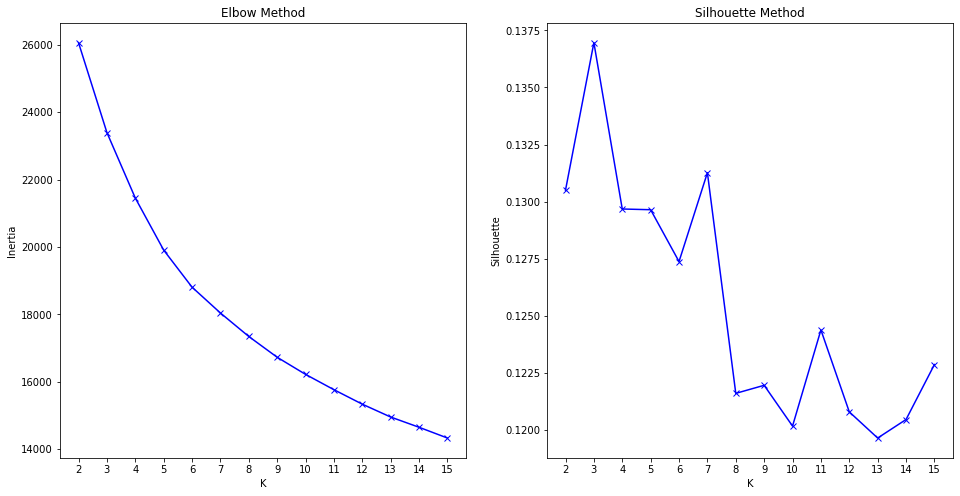

In [102]:
fig, ax = plt.subplots(1,2,figsize=(16,8))
ax[0].plot(K, inertia, 'bx-')
ax[0].set_xlabel('K')
ax[0].set_ylabel('Inertia')
ax[0].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[0].set_title('Elbow Method')

ax[1].plot(K, silhouette, 'bx-')
ax[1].set_xlabel('K')
ax[1].set_ylabel('Silhouette')
ax[1].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[1].set_title('Silhouette Method')

In [128]:
songs_db["Cluster"] = KMeans(n_clusters=7, random_state=22).fit(songs_data_pt_ss).predict(songs_data_pt_ss)
display(songs_db["Cluster"][songs_db["Label"] == "H"].value_counts())
display(songs_db["Cluster"][songs_db["Label"] == "N"].value_counts())

0    47
5    19
3    14
6    11
4     9
Name: Cluster, dtype: int64

4    681
3    676
6    574
5    534
0    476
2    399
1    335
Name: Cluster, dtype: int64

In [334]:
songs_db

,Song,Artist,ID,Link,Danceability,Energy,Key,Loudness,Mode,Speechiness,...,Valence,Tempo,Duration,Time Signature,Label,GM4T,AC4,KM5,KM6,KM
0,BREAK MY SOUL,Beyoncé,2KukL7UlQ8TdvpaA7bY3ZJ,https://open.spotify.com/track/2KukL7UlQ8Tdvpa...,0.687,0.887,1,-5.040,0,0.0826,...,0.853,114.941,278282,4,H,3,0,1,3,2
1,As It Was,Harry Styles,4LRPiXqCikLlN15c3yImP7,https://open.spotify.com/track/4LRPiXqCikLlN15...,0.520,0.731,6,-5.338,0,0.0557,...,0.662,173.930,167303,4,H,3,0,1,3,2
2,About Damn Time,Lizzo,1PckUlxKqWQs3RlWXVBLw3,https://open.spotify.com/track/1PckUlxKqWQs3Rl...,0.836,0.743,10,-6.305,0,0.0656,...,0.722,108.966,191822,4,H,3,0,1,3,2
3,Running Up That Hill (A Deal With God) - 2018 ...,Kate Bush,29d0nY7TzCoi22XBqDQkiP,https://open.spotify.com/track/29d0nY7TzCoi22X...,0.625,0.533,10,-11.903,0,0.0596,...,0.139,108.296,300840,4,H,3,0,1,3,2
4,STAYING ALIVE (feat. Drake & Lil Baby),DJ Khaled,0g2Bbgy7P41pFjMWJuzsf4,https://open.spotify.com/track/0g2Bbgy7P41pFjM...,0.718,0.461,4,-7.676,0,0.0797,...,0.181,129.953,178176,4,H,3,0,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3770,I Don't Like,Chief Keef,1h6kgem1ai8vUgO1rZOwfB,https://open.spotify.com/track/1h6kgem1ai8vUgO...,0.742,0.844,2,-4.622,1,0.0479,...,0.416,131.986,293840,4,N,1,1,3,0,1
3771,"Happy - From ""Despicable Me 2""",Pharrell Williams,5b88tNINg4Q4nrRbrCXUmg,https://open.spotify.com/track/5b88tNINg4Q4nrR...,0.647,0.822,5,-4.662,0,0.1830,...,0.962,160.019,232720,4,N,3,0,1,3,2
3772,Express Yourself - Remastered Version,Charles Wright & The Watts 103rd Street Rhythm...,6gQZKkphKIMxZgca5r7ImA,https://open.spotify.com/track/6gQZKkphKIMxZgc...,0.461,0.818,8,-8.482,1,0.1250,...,0.721,92.305,229653,4,N,1,1,3,0,1
3773,Call Me The Breeze,J.J. Cale,0D4JiHE8NkSQa5ZdZkYYLw,https://open.spotify.com/track/0D4JiHE8NkSQa5Z...,0.815,0.415,11,-15.573,1,0.0384,...,0.817,91.539,157617,4,N,1,1,2,4,1


## DBSCAN

In [105]:
d = distance_matrix(songs_data_pt_ss,songs_data_pt_ss)

In [106]:
d2 = np.sort(d)[:,1:]

In [107]:
f = d2[:,2]

In [108]:
f_final = np.sort(f)[::-1]
f1_final = f_final[:500]
f2_final = f_final[:200]
f3_final = f_final[:50]

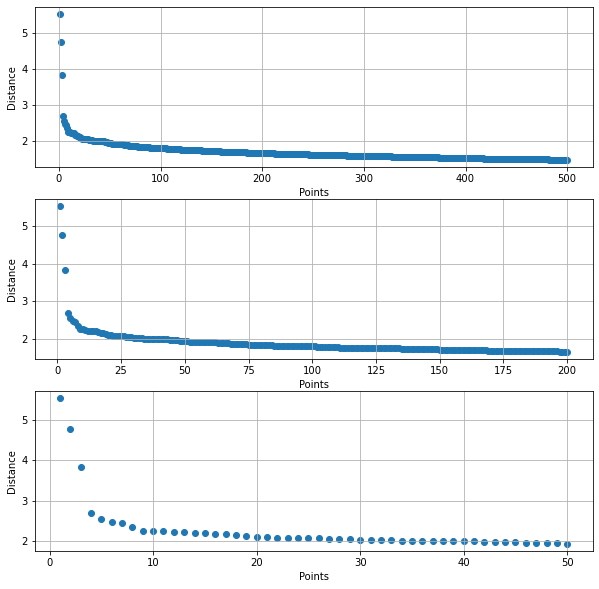

In [109]:
fig, ax = plt.subplots(3,1, figsize=(10,10))

ax[0].scatter(range(1,len(f1_final)+1), f1_final)
ax[0].set_xlabel("Points")
ax[0].set_ylabel("Distance")
ax[0].grid(visible=True)

ax[1].scatter(range(1,len(f2_final)+1), f2_final)
ax[1].set_xlabel("Points")
ax[1].set_ylabel("Distance")
ax[1].grid(visible=True)

ax[2].scatter(range(1,len(f3_final)+1), f3_final)
ax[2].set_xlabel("Points")
ax[2].set_ylabel("Distance")
ax[2].grid(visible=True)

In [110]:
f_final[4]

2.556919002986411

In [113]:
dbscan = DBSCAN(eps=f_final[4], min_samples=5)
yhat = dbscan.fit_predict(songs_data_pt_ss)
clusters = np.unique(yhat)
np.unique(yhat)

array([-1,  0], dtype=int64)

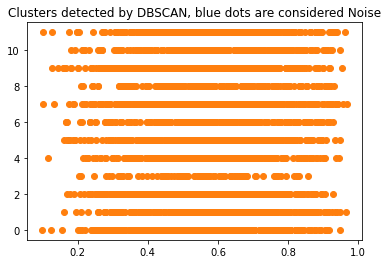

In [116]:
for index, cluster in enumerate(list(clusters)):
	row_ix = np.where(yhat == cluster)
	plt.scatter(songs_data.to_numpy()[row_ix, 0], songs_data.to_numpy()[row_ix, 1])
    
plt.title("Clusters detected by DBSCAN, blue dots are considered Noise")
plt.show()

## Gaussian Mixtures

In [117]:
N = range(3, 11)
covariance_types = ["full", "tied", "diag", "spherical"]
silhouette_f = []
silhouette_t = []
silhouette_d = []
silhouette_s = []

for covariance in covariance_types:
    for n in N:
        print("Gaussian Mixture with {} components and covariance type = {}".format(n, covariance))
        print()
        
        gm = GaussianMixture(n_components = n, covariance_type = covariance, random_state=22)
        gm.fit(songs_data_pt_ss)
        
        name = ""
        
        if covariance == "full":
            name = "F"
            silhouette_f.append(silhouette_score(songs_data_pt_ss, gm.predict(songs_data_pt_ss)))
            
        elif covariance == "tied":
            name = "T"
            silhouette_t.append(silhouette_score(songs_data_pt_ss, gm.predict(songs_data_pt_ss)))
            
        elif covariance == "diag":
            name = "D"
            silhouette_d.append(silhouette_score(songs_data_pt_ss, gm.predict(songs_data_pt_ss)))
            
        else:
            name = "S"
            silhouette_s.append(silhouette_score(songs_data_pt_ss, gm.predict(songs_data_pt_ss)))
            
        filename = "../Models/GM_"+str(n)+"_"+name+".pkl"
        with open (filename, "wb") as file:
            pickle.dump(gm, file)

Gaussian Mixture with 3 components and covariance type = full

Gaussian Mixture with 4 components and covariance type = full

Gaussian Mixture with 5 components and covariance type = full

Gaussian Mixture with 6 components and covariance type = full

Gaussian Mixture with 7 components and covariance type = full

Gaussian Mixture with 8 components and covariance type = full

Gaussian Mixture with 9 components and covariance type = full

Gaussian Mixture with 10 components and covariance type = full

Gaussian Mixture with 3 components and covariance type = tied

Gaussian Mixture with 4 components and covariance type = tied

Gaussian Mixture with 5 components and covariance type = tied

Gaussian Mixture with 6 components and covariance type = tied

Gaussian Mixture with 7 components and covariance type = tied

Gaussian Mixture with 8 components and covariance type = tied

Gaussian Mixture with 9 components and covariance type = tied

Gaussian Mixture with 10 components and covariance typ

Text(0.5, 1.0, 'Silhouette for covariance type = Spherical')

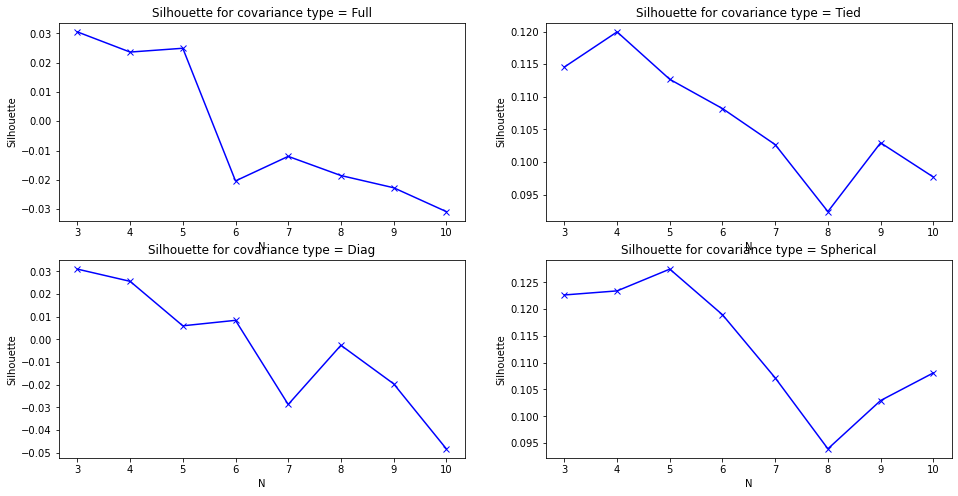

In [118]:
fig, ax = plt.subplots(2,2,figsize=(16,8))

ax[0,0].plot(N, silhouette_f, 'bx-')
ax[0,0].set_xlabel('N')
ax[0,0].set_ylabel('Silhouette')
ax[0,0].set_xticks(np.arange(min(N), max(N)+1, 1.0))
ax[0,0].set_title('Silhouette for covariance type = Full')

ax[0,1].plot(N, silhouette_t, 'bx-')
ax[0,1].set_xlabel('N')
ax[0,1].set_ylabel('Silhouette')
ax[0,1].set_xticks(np.arange(min(N), max(N)+1, 1.0))
ax[0,1].set_title('Silhouette for covariance type = Tied')

ax[1,0].plot(N, silhouette_d, 'bx-')
ax[1,0].set_xlabel('N')
ax[1,0].set_ylabel('Silhouette')
ax[1,0].set_xticks(np.arange(min(N), max(N)+1, 1.0))
ax[1,0].set_title('Silhouette for covariance type = Diag')

ax[1,1].plot(N, silhouette_s, 'bx-')
ax[1,1].set_xlabel('N')
ax[1,1].set_ylabel('Silhouette')
ax[1,1].set_xticks(np.arange(min(N), max(N)+1, 1.0))
ax[1,1].set_title('Silhouette for covariance type = Spherical')

In [122]:
silhouette_score(songs_data_pt_ss, GaussianMixture(n_components = 4, covariance_type="tied", random_state=22).fit(songs_data_pt_ss).predict(songs_data_pt_ss))

0.1199410276588735

In [123]:
silhouette_score(songs_data_pt_ss, GaussianMixture(n_components = 5, covariance_type="spherical", random_state=22).fit(songs_data_pt_ss).predict(songs_data_pt_ss))

0.12746695372591496

In [125]:
# songs_db["Cluster"] = GaussianMixture(n_components = 5, covariance_type="spherical", random_state=22).fit(songs_data_pt_ss).predict(songs_data_pt_ss)
# display(songs_db["Cluster"][songs_db["Label"] == "H"].value_counts())
# display(songs_db["Cluster"][songs_db["Label"] == "N"].value_counts())

4    55
2    19
1    19
0     7
Name: Cluster, dtype: int64

1    1029
0     754
3     695
2     657
4     540
Name: Cluster, dtype: int64

## Agglomerative Clustering

In [126]:
N = range(2, 11)
silhouette = []

for n in N:
    print("Agglomerative Clustering with {} components".format(n))
    print()
        
    aglo = AgglomerativeClustering(distance_threshold=None, n_clusters=n)
    silhouette.append(silhouette_score(songs_data_pt_ss, aglo.fit_predict(songs_data_pt_ss)))

    filename = "../Models/AC_"+str(n)+".pkl"
    with open (filename, "wb") as file:
        pickle.dump(aglo, file)

Agglomerative Clustering with 2 components

Agglomerative Clustering with 3 components

Agglomerative Clustering with 4 components

Agglomerative Clustering with 5 components

Agglomerative Clustering with 6 components

Agglomerative Clustering with 7 components

Agglomerative Clustering with 8 components

Agglomerative Clustering with 9 components

Agglomerative Clustering with 10 components



Text(0.5, 1.0, 'Silhouette for Agglomerative Clustering')

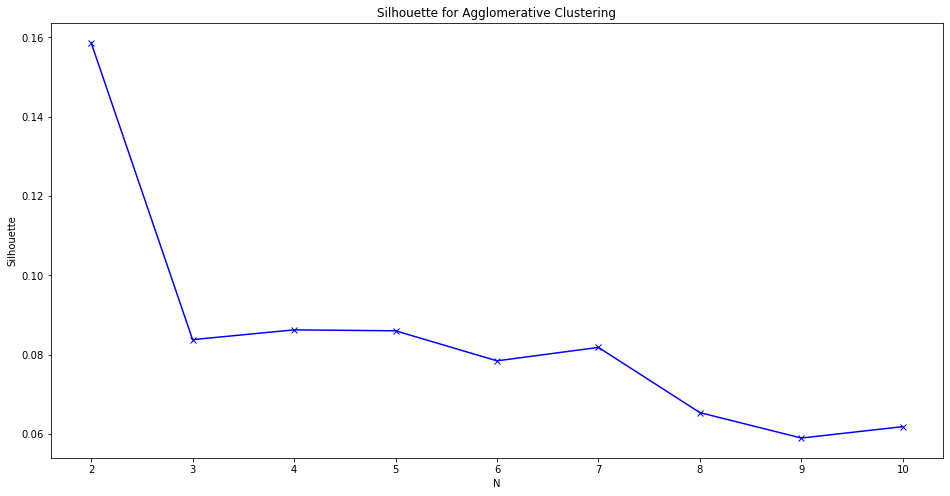

In [127]:
fig, ax = plt.subplots(1,1,figsize=(16,8))

ax.plot(N, silhouette, 'bx-')
ax.set_xlabel('N')
ax.set_ylabel('Silhouette')
ax.set_xticks(np.arange(min(N), max(N)+1, 1.0))
ax.set_title('Silhouette for Agglomerative Clustering')

In [439]:
# songs_db["Cluster"] = AgglomerativeClustering(distance_threshold=None, n_clusters=7).fit_predict(songs_data_pt_ss)

In [440]:
# songs_db["Cluster"].value_counts()

0    1489
1    1059
2     788
3     381
4      58
Name: AC4, dtype: int64

## Choosing cluster method

We decided to choose the K-Means with k = 8 due to having the least class imbalance among the 3 models that worked for us.

In [135]:
songs_db.head()

,Song,Artist,ID,Link,Danceability,Energy,Key,Loudness,Mode,Speechiness,Instrumentalness,Liveness,Valence,Tempo,Duration,Time Signature,Label,Cluster
0,BREAK MY SOUL,Beyoncé,2KukL7UlQ8TdvpaA7bY3ZJ,https://open.spotify.com/track/2KukL7UlQ8Tdvpa...,0.687,0.887,1,-5.040,0,0.0826,0.000002,0.2700,0.853,114.941,278282,4,H,6
1,As It Was,Harry Styles,4LRPiXqCikLlN15c3yImP7,https://open.spotify.com/track/4LRPiXqCikLlN15...,0.520,0.731,6,-5.338,0,0.0557,0.001010,0.3110,0.662,173.930,167303,4,H,5
2,About Damn Time,Lizzo,1PckUlxKqWQs3RlWXVBLw3,https://open.spotify.com/track/1PckUlxKqWQs3Rl...,0.836,0.743,10,-6.305,0,0.0656,0.000000,0.3350,0.722,108.966,191822,4,H,0
3,Running Up That Hill (A Deal With God) - 2018 ...,Kate Bush,29d0nY7TzCoi22XBqDQkiP,https://open.spotify.com/track/29d0nY7TzCoi22X...,0.625,0.533,10,-11.903,0,0.0596,0.002660,0.0546,0.139,108.296,300840,4,H,4
4,STAYING ALIVE (feat. Drake & Lil Baby),DJ Khaled,0g2Bbgy7P41pFjMWJuzsf4,https://open.spotify.com/track/0g2Bbgy7P41pFjM...,0.718,0.461,4,-7.676,0,0.0797,0.000000,0.2830,0.181,129.953,178176,4,H,0


In [136]:
songs_db.to_csv("../Data/Clean/Songs_DB_Clusters.csv")